<p align="center">
  <span style="color:Navy; font-size:200%; font-weight:bold; vertical-align:middle;">
    Temas Selectos: Python para Ciencias de la Tierra
  </span>
  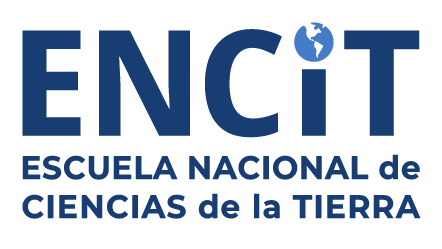
</p>
<p align="center" style="line-height:1.2;">
  <span style="color:RoyalBlue; font-size:160%;">Tema 2: Manejo de datos</span><br/>
  <span style="color:DodgerBlue; font-size:140%;">Análisis exploratorio de datos </span><br/>
  <span style="font-size:100%;color:forestgreen"> Escuela Nacional de Ciencias de la Tierra  |  Semestre 2026-I</span>
</p>

---


# **<font color="ForestGreen">  Análisis exploratorio de datos </font>**

El análisis exploratorio de datos (AED), o EDA por sus siglas en inglés, es una fase inicial en el análisis de datos que utiliza visualizaciones y estadísticas para investigar y comprender las características principales de un conjunto de datos, buscando patrones, valores atípicos y relaciones entre variables. Su objetivo es explorar la estructura de los datos, la calidad y la presencia de anomalías, no confirmar una hipótesis estadística preexistente. Es un proceso creativo y de descubrimiento que sirve como paso previo esencial antes de realizar un análisis estadístico o creación de modelos más complejos. 

## **<font color="SeaGreen"> Variables Hidrogeoquímicas de Pozos de Agua </font>**

El agua subterránea es un recurso vital que soporta tanto los ecosistemas naturales como el desarrollo humano. La calidad del agua subterránea es influenciada por procesos hidrogeoquímicos que ocurren en el subsuelo, lo que afecta su composición química y, por ende, su uso para consumo humano, agrícola e industrial. La evaluación detallada de las características hidrogeoquímicas del agua subterránea es esencial para su gestión sostenible y protección. Este proyecto se enfoca en analizar las variables hidrogeoquímicas de pozos de agua, incluyendo temperatura '$T$', '$pH$', potencial de óxido-reducción ('$Eh$'), y concentraciones de iones como '$Na^+$', '$K^+$', '$Ca_2^+$', '$HCO_3^-$', '$SO_4^{2-}$', '$Cl^-$' y '$SiO_2$'.

El objetivo es llevar a cabo un análisis exploratorio de datos (AED) para entender las relaciones entre estas variables y cómo podrían influir en la calidad del agua subterránea.


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
# Para calcular la distancia de Mahalanobis
import matplotlib.gridspec as gridspec

In [ ]:
# carga de archivo csv
df=pd.read_csv('Datos_Jaral_PreFinal.csv')
df.head()

In [ ]:
df.columns

In [ ]:
df.info()

### **<font color="SeaGreen"> Organizacion y limpieza de datos </font>**

Los datos completos tienen una dimensión de **127 filas** y **14 columnas**. Dentro de los cuales hay registro de 126 informacion de cuerpos de agua. Las columnas tienen una estructura de:
**Columnas**:
- **Localidad** nombre de la ubicación del cuerpo de agua
- El **Tipo** de cuerpo de agua entre pozos, manatiales, norias, presas.
- La **Clase de Temp** variable categorica que define el grado de la temperatura del agua en baja, media y alta
- **T** = Valor de la Temperatura (°$C$)
- **pH** = Valor de la concentración de potencial de hidrogeno, medida de la acidez o alcalinidad de una solución acuosa
- **Eh** = potencial de óxido-reducción
- **Na+** = Concentración del ión sodio ($mg/L$)
- **K+** =  Concentración del ión potasio ($mg/L$)
- **Ca2** =  Concentración del ión calcio ($mg/L$)
- **HC03** = Concentración del ión bicarbonato ($mg/L$)
- **SO42-** = Concentración del ión Sulfato ($mg/L$)
- **Cl-** = Concentración del ión Cloro ($mg/L$)
- **SiO2** = Concentración del ión Silice ($mg/L$)

**Limpieza y transformación de datos**

1. Es necesario hacer la limpieza de la primera fila de datos con índice 0 que contiene unidades de las variables.
2. Las columnas necesitan limpieza dado que tienen espacios extras
3. Es importante definir previamente los tipos de datos para cada variable colocando valores de tipo float, int y string respectivamene



In [ ]:
# 1. Limpieza del indice 0 por no contener información de pozo
df = df[1:].reset_index(drop=True)

# 2. Strip del nombre las columnas
df.columns = [col.strip() for col in df.columns]
print(f'Nombre de columnas limpias: {df.columns.to_list()}')
df.rename(columns ={'HCO3 lab':'HCO3-'}, inplace= True)

In [ ]:
for i in df:
    print(df[i].unique())

In [ ]:
# 3. Actualizar solo las filas donde la primera letra esté en mayúscula
df.loc[df['Tipo'].str.istitle(), 'Tipo'] = df['Tipo'].str.lower()

In [ ]:
# 4. Conversipn del tipo de dato
conversiones = {
    'No': 'int',
    'T': 'float64',
    'pH': 'float64',
    'Eh': 'float64',
    'Na+': 'float64',
    'K+': 'float64',
    'Ca2+': 'float64',
    'HCO3-': 'float64',
    'SO42-': 'float64',
    'Cl-': 'float64',
    'SiO2': 'float64',
    'Clase Temp': 'category',
    'Tipo':'category'
}
# Aplicando la conversión de tipos de acuerdo al diccionario
df = df.astype(conversiones)
df.head()

In [ ]:
df.info()

### **<font color="SeaGreen"> Análisis estadístico básico </font>**
#### ¿Qué hacen las estadísticas descriptivas?

* Organizar y resumir: Transforman datos crudos en información comprensible. 
* Presentar información: Utilizan tablas, gráficos, diagramas y valores clave como promedios y porcentajes para resumir las características de un conjunto de datos. 
* Describir características: Muestran dónde se ubica el "centro" de los datos y cómo se distribuyen o varían los valores. 

#### **<font color="blue"> Medidas de tendencia central: Indican la ubicación central de los datos. </font>** 
1.  **Media**: El promedio aritmético de un conjunto de datos. 
2.  **Mediana**: El valor medio cuando los datos están ordenados. 
3.  **Moda**: El valor que aparece con más frecuencia en los datos.
4.  **Cuartiles**: Dividen al conjunto de datos en partes iguales.
       * $q_{25}$: Valor por debajo del cual esta el 25% de los datos.
       * $q_{50}$: Mediana
       * $q_{75}$: Valor por debajo del cual esta el 25% de los datos.
5. **Simetría o sesgo**: si la media, moda y mediana de una distribución de datos coinciden, entonces es simétrica. De lo contrario podemos tener:
     * Sesgo positivo: Media > Mediana > Moda
     * Sesgo negativo: Media < Mediana < Moda

#### **<font color="blue"> Medidas de dispersión: Muestran la variabilidad o la dispersión de los datos. </font>** 

1.  **Rango**: La diferencia entre el valor máximo y mínimo. 
2.  **Desviación estándar**: Mide cuánto se alejan los datos del promedio.  
3.  **Varianza**: Representa el promedio de las distancias al cuadrado entre los datos y su media.
4.  **Rango intercuartil (IQR)**: $q_{75}-q_{25}$
 


In [ ]:
# Definir variables de las cuales se hará el AED.
VariablesNumAnalis = ['T', 'pH', 'Eh', 'Na+', 'K+', 'Ca2+', 'HCO3-', 'SO42-', 'Cl-', 'SiO2']

for i in VariablesNumAnalis:
    print(i , 'promedio =' ,df[i].mean())

In [ ]:
for i in VariablesNumAnalis:
    print(i , 'moda =' ,df[i].mode())

In [ ]:
for i in VariablesNumAnalis:
    print(i , 'mediana =' ,df[i].median())


<div class="alert alert-block alert-info">
<b>Nota:</b> Pandas tiene la funcion describe(), pero no contiene todos los estadisticos.
</div>


In [ ]:
df[VariablesNumAnalis].describe()

In [ ]:
df['Clase Temp'].describe()

##### Para obtener un resumen estadístico más completo, podemos definir la siguiente función.

In [ ]:
def estadigrafos(df, VariableName):
    """
    Calcula estadísticas descriptivas básicas para una columna específica de un DataFrame.

    Parámetros:
    - df (pandas.DataFrame): DataFrame que contiene los datos.
    - VariableName (str): Nombre de la columna para la cual calcular las estadísticas.

    Retorna:
    - pandas.DataFrame: DataFrame con las estadísticas de la columna especificada.
    """
    # Calcula las estadísticas deseadas
    minim = df[VariableName].min()
    Q1 = df[VariableName].quantile(0.25)
    prome = df[VariableName].mean()
    Q2 = df[VariableName].median()
    Q3 = df[VariableName].quantile(0.75)
    maxim = df[VariableName].max()
    varia = df[VariableName].var()
    desvi = df[VariableName].std()
    rango = maxim - minim
    IQR = Q3 - Q1
    coefv = desvi / prome if prome != 0 else np.nan  # Previene división por cero
    simetria = df[VariableName].skew()
    curtosis = df[VariableName].kurtosis()

    # Crea un DataFrame con los resultados
    estadisticas = pd.DataFrame({
        VariableName: [minim, Q1, prome, Q2, Q3, maxim, varia, desvi, rango, IQR, coefv, simetria, curtosis]
    }, index=['Mínimo', 'Primer Cuartil', 'Promedio', 'Mediana', 'Tercer Cuartil', 'Máximo', 'Varianza', 'Desviación Estandar', 'Rango', 'IQR', 'Coeficiente de variación', 'Simetria', 'Curtosis'])

    return estadisticas.round(2)

In [ ]:
VariablesNumAnalis = ['T', 'pH', 'Eh', 'Na+', 'K+', 'Ca2+', 'HCO3-', 'SO42-', 'Cl-', 'SiO2']

estadisticas = pd.DataFrame()
for variable in VariablesNumAnalis:
    df_est = estadigrafos(df, variable)
    estadisticas = pd.concat([estadisticas, df_est], axis = 1)

estadisticas

#### **<font color="blue"> Histogramas y digrama de caja y bigotes (boxplots) </font>** 


![his-box.png](his-box.png)

**Histogramas** o gráficos de barras: Son una representación gráfica de la distribución de frecuencias de un conjunto de valores numéricos. 

De un histograma podemos obtener:
* Rangos de valores
* Asimetría o sesgo
* Intervalos de valores con frecuencias máximas
* Datos atípicos (es atípico si $dato<q_{0.25}-1.5*IQR$ o si $dato>q_{0.75}+1.5*IQR$)
* Dispersión

In [ ]:
def HistBox(variables, df):
    plt.figure(figsize=(20, 20))
    outer_grid = gridspec.GridSpec(6, 2, wspace=0.2, hspace=0.4)
    custom_params = {"axes.spines.right": True, "axes.spines.top": True, "axes.spines.left": True}
    sns.set_theme(style='whitegrid', context="talk", rc=custom_params, color_codes = True)
    sns.set_style("ticks", {"axes.grid": True, "grid.linestyle": "--"})

    for i, variable in enumerate(variables):
        inner_grid = gridspec.GridSpecFromSubplotSpec(2, 1,
                                                      subplot_spec=outer_grid[i],
                                                      height_ratios=[4, 1],
                                                      hspace=0.02)  # Ajustado para minimizar el espacio entre histogramas y boxplots

        # Histograma
        ax_hist = plt.Subplot(plt.gcf(), inner_grid[0])
        sns.histplot(df[variable], kde=True, stat='density', color='yellowgreen', ax=ax_hist)
        ax_hist.set_title(variable)
        ax_hist.set_xlabel('')  # Mantener esto para limpieza
        plt.gcf().add_subplot(ax_hist)
        ax_hist.tick_params(axis='x',          # Cambios para ocultar solo los ticks (no las etiquetas, que ya están ocultas)
                            which='both',      # Afecta a ticks mayores y menores
                            bottom=False,      # Oculta ticks inferiores
                            top=False,         # Oculta ticks superiores (si estuvieran visibles)
                            labelbottom=False) # Oculta las etiquetas de los ticks inferiores
        # Calcula y anota estadísticas
        mean = df[variable].mean()
        median = df[variable].median()
        mode = df[variable].mode()[0]  # Moda
        max_value = df[variable].max()
        min_value = df[variable].min()

        # Agrega líneas verticales para cada estadística
        lines = [
            ax_hist.axvline(mean, color='red', linestyle='dashed', linewidth=2),
            ax_hist.axvline(median, color='green', linestyle='dashed', linewidth=2)#,
        ]

        ax_hist.grid(True)

        # Boxplot
        ax_box = plt.Subplot(plt.gcf(), inner_grid[1], sharex=ax_hist)
        sns.boxplot(x=df[variable], ax=ax_box, color='lightgreen', showmeans=True,
                    meanprops={"marker":"o", "markerfacecolor":'red',
                               "markeredgecolor":"gray", "markersize":"10"})
        ax_box.set_xlabel('')
        ax_box.tick_params(axis='x',          # Cambios para ocultar solo los ticks (no las etiquetas, que ya están ocultas)
                            which='both',      # Afecta a ticks mayores y menores
                            bottom=True,      # Oculta ticks inferiores
                            top=True,         # Oculta ticks superiores (si estuvieran visibles)
                            labelbottom=True)
        plt.gcf().add_subplot(ax_box)

In [ ]:
HistBox(VariablesNumAnalis, df)

#### **<font color="blue"> AED para variable categóricas </font>** 

Para las variables contínuas se pueden obtener varias medidas que describan los datos, para el caso de variables categóricas la cosa cambia un poco.


<div class="alert alert-block alert-info">
<b>Nota:</b> Para hacer el AED, deben separar las variables numéricas contínuas de las variables categóricas.
</div>


In [ ]:
df.describe()

In [ ]:
df.columns

In [ ]:
VariablesCatAnalis = ['Tipo', 'Clase Temp']

In [ ]:
df[VariablesCatAnalis].describe()

In [ ]:
for i in VariablesCatAnalis:
    plt.figure(figsize=(10, 6))
    conteo = df[i].value_counts()
    plt.bar(conteo.index, conteo.values, color='skyblue')
    plt.ylabel('Frecuencia absoluta')
    plt.title('Gráfico de barras de ' + i)
    plt.xticks(rotation=45)  # opcional, mejora la legibilidad
    plt.show()

In [ ]:
for i in VariablesCatAnalis:
    plt.figure(figsize=(10, 6))
    frecuencia_relativa = df[i].value_counts(normalize=True)
    plt.bar(frecuencia_relativa.index, frecuencia_relativa.values, color='skyblue')
    plt.ylabel('Frecuencia relativa')
    plt.title('Gráfico de barras de ' + i)
    plt.xticks(rotation=45)  # Mejora la legibilidad si hay muchas categorías
    plt.show()

---
<a name='ej-1'></a>
### **<font color="DodgerBlue"> Ejercicio </font>**

<font color="DarkBlue"> 1. Crear un DataFrame con los datos de la siguiente liga "https://corgis-edu.github.io/corgis/datasets/csv/earthquakes/earthquakes.csv"
 
Para mas informacion sobre la base de datos : https://corgis-edu.github.io/corgis/csv/earthquakes/
    
<font color="DarkBlue"> 2. Realizar la limpieza y organizacion de los datos.
    
<font color="DarkBlue"> 3. Elijan 3 o 4 variables contínuas y 1 o 2 variables categóricas para hacer el AED.
    
---